In [12]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

Problem #2:
Suppose we have the following 5 “2-dimensional” vectors representing 5 separate documents.
1. A = (3,7)
2. B = (5,36)
3. C = (7,29)
4. D = (212,72)
5. E = (23,2)
Write Python code to compute the following: 𝐴𝑁𝑜𝑟𝑚,𝐵𝑁𝑜𝑟𝑚,𝐶𝑁𝑜𝑟𝑚,𝐷𝑁𝑜𝑟𝑚,𝐸𝑁𝑜𝑟𝑚.

Plot all the 5 normalized vectors.

          0         1
0  0.393919  0.919145
1  0.137568  0.990492
2  0.234641  0.972082
3  0.946882  0.321582
4  0.996241  0.086630


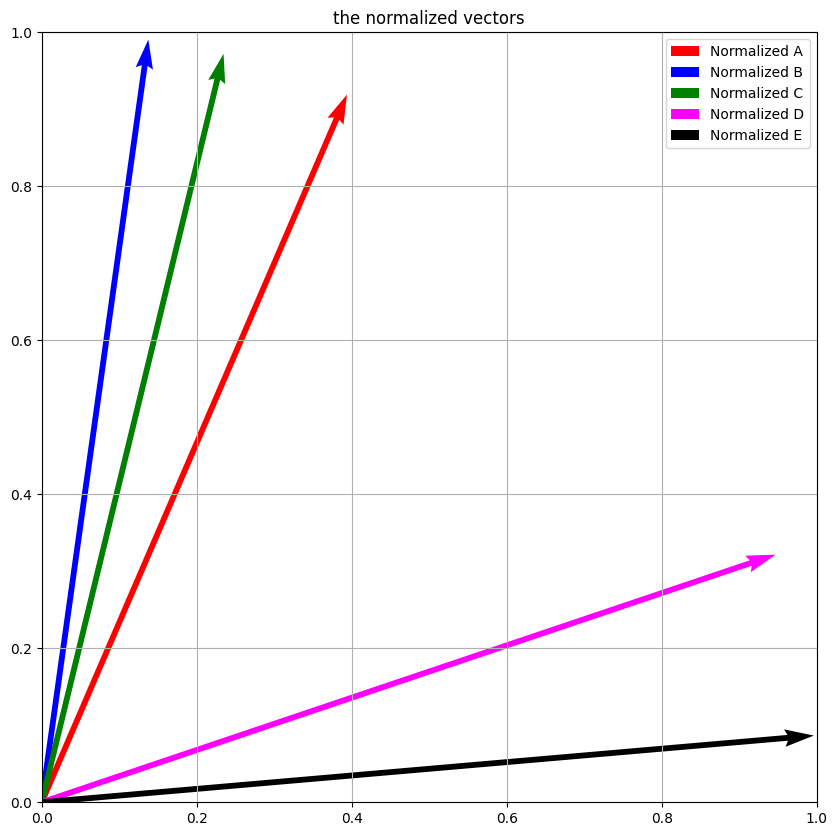

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
A = np.array([3, 7])
B = np.array([5, 36])
C = np.array([7, 29])
D = np.array([212, 72])
E = np.array([23, 2])

# List of vectors
initial_vectors = [A, B, C, D, E]

# Function to compute the normalized vector
def normalize(vector):
    norm = np.linalg.norm(vector)
    return vector / norm

# Computing the normalized vectors

normalized_vectors = list(map(normalize, initial_vectors))
print(pd.DataFrame(normalized_vectors))

# Plotting the vectors

plt.figure(figsize=(10, 10))
colors = ['red', 'blue', 'green', 'magenta', 'black']
labels = ['A', 'B', 'C', 'D', 'E']

for i, vec in enumerate(normalized_vectors):
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy',
                     scale=1, color=colors[i],
                     label=f'Normalized {labels[i]}')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.title('the normalized vectors')
plt.legend()
plt.show()

In [14]:
# Preparing to print the data frame as a list of lists
both = []
for i in range(len(initial_vectors)):
    both.append([
        initial_vectors[i][0],
        initial_vectors[i][1],
        normalized_vectors[i][0],
        normalized_vectors[i][1]
    ])

df = pd.DataFrame(both, columns=['Original  X', 'Original  Y', 'Normalized X', 'Normalized Y'],
                        index=['A', 'B', 'C', 'D', 'E'])
print(df)

   Original  X  Original  Y  Normalized X  Normalized Y
A            3            7      0.393919      0.919145
B            5           36      0.137568      0.990492
C            7           29      0.234641      0.972082
D          212           72      0.946882      0.321582
E           23            2      0.996241      0.086630


Problem#3:

a) Compute the Euclidean distance between all the 5 normalized vectors computed in Problem#2.

b) Compute the Manhattan distance between all the 5 normalized vectors computed in Problem#2.

c) Compute the “Cosine similarity” and “Cosine distance” between all the 5 normalized vectors computed in Problem#2.

Euclidean Distance Matrix:
          A         B         C         D         E
A  0.000000  0.266094  0.167845  0.814155  1.027557
B  0.266094  0.000000  0.098803  1.049966  1.246710
C  0.167845  0.098803  0.000000  0.964592  1.167930
D  0.814155  1.049966  0.964592  0.000000  0.240082
E  1.027557  1.246710  1.167930  0.240082  0.000000


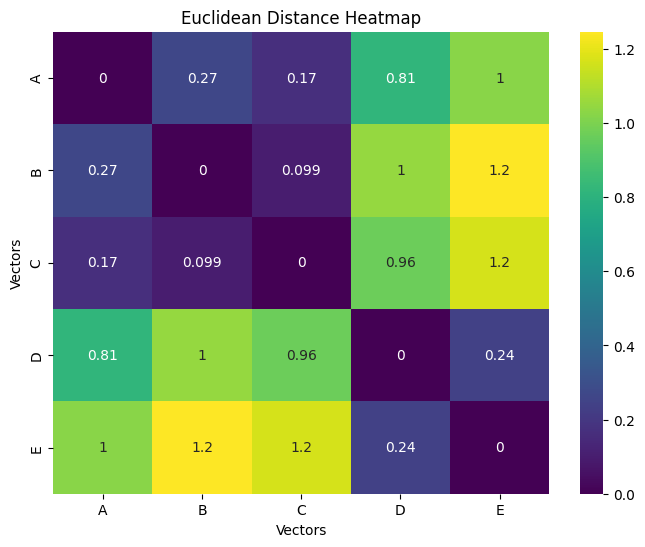

In [15]:
# a function to compute the Euclidean distance

def euclidean_distance(vector1, vector2):
    return np.sqrt(((vector1 - vector2) ** 2).sum())

# initiate a distance matrix, compute the euclidean distance, and print the results
euclidean_matrix = np.zeros((len(normalized_vectors), len(normalized_vectors)))

for i in range(len(normalized_vectors)):
    for j in range(len(normalized_vectors)):
        euclidean_matrix[i, j] = euclidean_distance(normalized_vectors[i], normalized_vectors[j])

euclidean_distances = pd.DataFrame(euclidean_matrix,
                                   index=['A', 'B', 'C', 'D', 'E'],
                                   columns=['A', 'B', 'C', 'D', 'E'])

print("Euclidean Distance Matrix:")
print(euclidean_distances)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(euclidean_distances, annot=True, cmap='viridis')
plt.title('Euclidean Distance Heatmap')
plt.xlabel('Vectors')
plt.ylabel('Vectors')
plt.show()

Manhattan Distance Matrix:
          A         B         C         D         E
A  0.000000  0.327698  0.212216  1.150525  1.434837
B  0.327698  0.000000  0.115482  1.478223  1.762535
C  0.212216  0.115482  0.000000  1.362741  1.647053
D  1.150525  1.478223  1.362741  0.000000  0.284312
E  1.434837  1.762535  1.647053  0.284312  0.000000


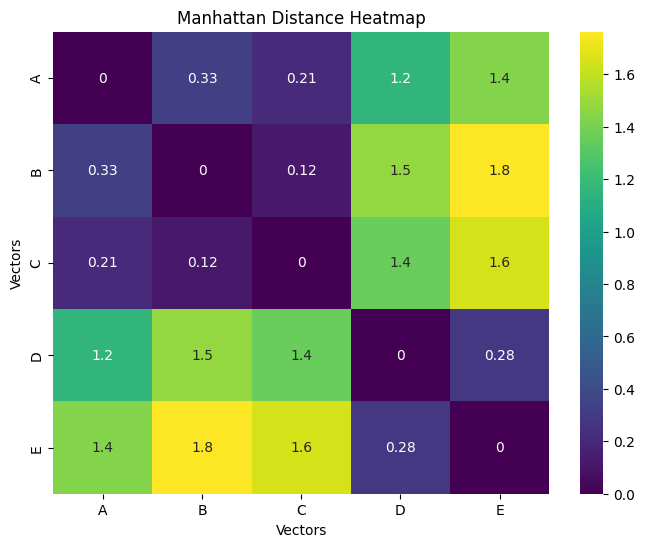

In [16]:
# function to compute the Manhattan distance

def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

# initiate a distance matrix, compute the manhattan distance, and print the results
manhattan_matrix = np.zeros((len(normalized_vectors), len(normalized_vectors)))

for i in range(len(normalized_vectors)):
    for j in range(len(normalized_vectors)):
        manhattan_matrix[i, j] = manhattan_distance(normalized_vectors[i], normalized_vectors[j])

manhattan_distances = pd.DataFrame(manhattan_matrix,
                                   index=['A', 'B', 'C', 'D', 'E'],
                                   columns=['A', 'B', 'C', 'D', 'E'])

print("Manhattan Distance Matrix:")
print(manhattan_distances)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(manhattan_distances, annot=True, cmap='viridis')
plt.title('Manhattan Distance Heatmap')
plt.xlabel('Vectors')
plt.ylabel('Vectors')
plt.show()

Cosine Similarity Matrix:
          A         B         C         D         E
A  1.000000  0.964597  0.985914  0.668576  0.472064
B  0.964597  1.000000  0.995119  0.448786  0.222857
C  0.985914  0.995119  1.000000  0.534781  0.317970
D  0.668576  0.448786  0.534781  1.000000  0.971180
E  0.472064  0.222857  0.317970  0.971180  1.000000


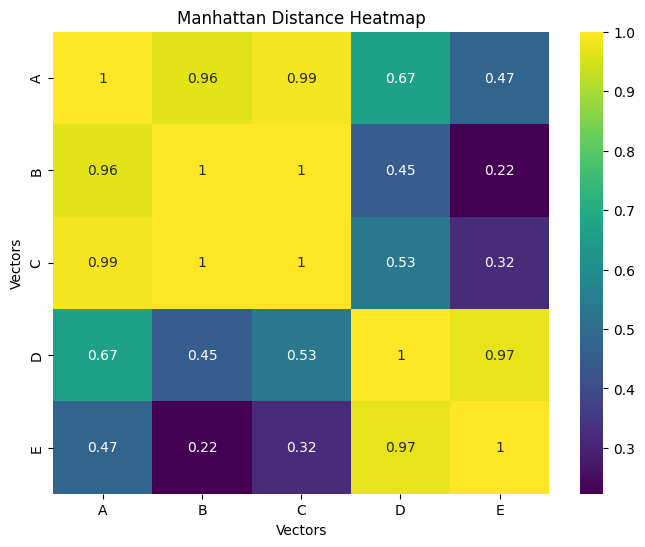

In [17]:
# a function to compute Cosine Similarity

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_a = np.linalg.norm(vector1)
    norm_b = np.linalg.norm(vector2)
    return dot_product / (norm_a * norm_b)

# initiate a distance matrix, compute the cosine similarity, and print the results

cosine_matrix = np.zeros((len(normalized_vectors), len(normalized_vectors)))

for i in range(len(normalized_vectors)):
    for j in range(len(normalized_vectors)):
        cosine_matrix[i, j] = cosine_similarity(normalized_vectors[i], normalized_vectors[j])

cosine_distances = pd.DataFrame(cosine_matrix,
                                   index=['A', 'B', 'C', 'D', 'E'],
                                   columns=['A', 'B', 'C', 'D', 'E'])

print("Cosine Similarity Matrix:")
print(cosine_distances)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_distances, annot=True, cmap='viridis')
plt.title('Manhattan Distance Heatmap')
plt.xlabel('Vectors')
plt.ylabel('Vectors')
plt.show()

Problem #4:

Suppose a user enters a query to a search engine. The query vector is (4,23).

• Compute the Cosine distance between the normalized query vector and all the 5 normalized vectors representing documents used in problem #2.

• Out of the 5 documents used in problem #2, which document is closest to the query vector?

In [18]:
# Define and normalize the query vector
query_vector = np.array([4, 23])
normalized_query = normalize(query_vector)

Cosine Similarity Matrix:
   Cosine Distance
A         0.026953
B         0.000584
C         0.002090
D         0.520933
E         0.743954


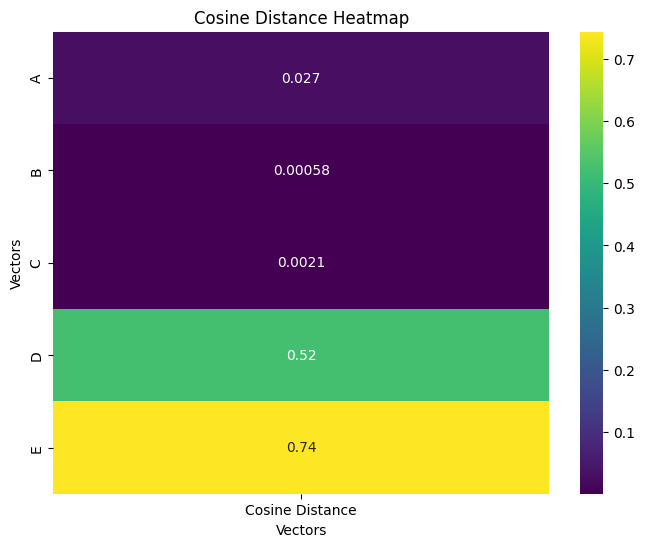

In [19]:
# Initialize a cosine distance array
query_cosine_matrix = np.zeros(len(normalized_vectors))

# Calculate cosine distances for each document vector
for i in range(len(normalized_vectors)):
    similarity = cosine_similarity(normalized_vectors[i], normalized_query)
    query_cosine_matrix[i] = 1 - similarity

query_cosine_distances = pd.DataFrame(query_cosine_matrix,
                                       index=['A', 'B', 'C', 'D', 'E'],
                                       columns=['Cosine Distance'])

print("Cosine Similarity Matrix:")
print(query_cosine_distances)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(query_cosine_distances, annot=True, cmap='viridis')
plt.title('Cosine Distance Heatmap')
plt.xlabel('Vectors')
plt.ylabel('Vectors')
plt.show()

In [ ]:
# Document ‘B’ is closest to the query vector.

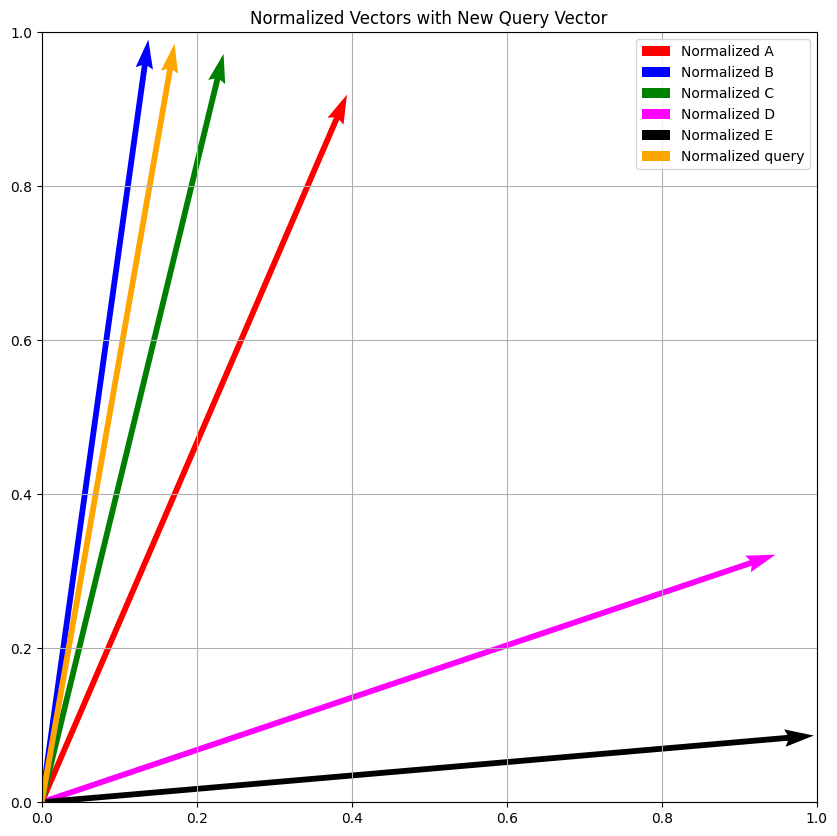

In [20]:
# Add the new normalized vector to the list of normalized vectors
new_normalized_vectors = np.vstack([normalized_vectors, normalized_query])

# Plotting the vectors
plt.figure(figsize=(10, 10))
colors = ['red', 'blue', 'green', 'magenta', 'black', 'orange']
labels = ['A', 'B', 'C', 'D', 'E', 'query']

for i, vec in enumerate(new_normalized_vectors):
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy',
               scale=1, color=colors[i],
               label=f'Normalized {labels[i]}')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.title('Normalized Vectors with New Query Vector')
plt.legend()
plt.show()